##### 1 DataFrame

- pandas에서 제공해주는 자료구조
- 행과 열을 가지는 표와 같은 형태(2차원)

In [2]:
import pandas as pd

In [3]:
population = pd.DataFrame({'2020':[9668465,3391946,2942828,1450062],
        '2010' :[10312545,3567910,2758296,1454636]})
population

,2020,2010
0,9668465,10312545
1,3391946,3567910
2,2942828,2758296
3,1450062,1454636


In [4]:
# 인덱스 명칭 변경
population.index=['서울','부산','인천','광주']
population

,2020,2010
서울,9668465,10312545
부산,3391946,3567910
인천,2942828,2758296
광주,1450062,1454636


In [5]:
#list 자료구조를 활용해서 DataFrame 생성하기
# list에는 key, value 값 가지지 않는다.
data = [[9668465,3391946,2942828,1450062],
         [10312545,3567910,2758296,1454636]]

index = ['2020', '2010']
col = ['서울','부산','인천','광주']
df = pd.DataFrame(data, index=index, columns = col)
df

,서울,부산,인천,광주
2020,9668465,3391946,2942828,1450062
2010,10312545,3567910,2758296,1454636


In [6]:
# 행, 열 전치(Transpose)
df = df.T
df

,2020,2010
서울,9668465,10312545
부산,3391946,3567910
인천,2942828,2758296
광주,1450062,1454636


### 1.1 DataFrame 구조 파악하기
- values: 값, 데이터 확인하기
- index: 인덱스 확인하기
- colums : 

In [7]:
# DataFrame 값만 확인해보기
df.values

array([[ 9668465, 10312545],
       [ 3391946,  3567910],
       [ 2942828,  2758296],
       [ 1450062,  1454636]], dtype=int64)

In [8]:
df.index

Index(['서울', '부산', '인천', '광주'], dtype='object')

In [9]:
df.columns

Index(['2020', '2010'], dtype='object')

### 2 DataFrame 인덱싱, 슬라이싱

In [10]:
df

,2020,2010
서울,9668465,10312545
부산,3391946,3567910
인천,2942828,2758296
광주,1450062,1454636


In [11]:
df['2020']
# 열 인덱싱 할 땐 이름을 입력해줘야 하고 결과값을 Series로 출력된다.

서울    9668465
부산    3391946
인천    2942828
광주    1450062
Name: 2020, dtype: int64

In [12]:
df[['2020']]

,2020
서울,9668465
부산,3391946
인천,2942828
광주,1450062


In [13]:
df[['2020','2010']]

,2020,2010
서울,9668465,10312545
부산,3391946,3567910
인천,2942828,2758296
광주,1450062,1454636


In [14]:
# df['서울']
# 열인덱싱만 가능

In [15]:
data3 = {'2020':[9668465,3391946,2942828,1450062],
        '2010' :[10312545,3567910,2758296,1454636],
         '2005':[9762546,3512547,2517680,1456016]
        }
df3 = pd.DataFrame(data3,index = ['서울','부산','인천','광주'])
df3

,2020,2010,2005
서울,9668465,10312545,9762546
부산,3391946,3567910,3512547
인천,2942828,2758296,2517680
광주,1450062,1454636,1456016


In [16]:
#행 슬라이싱이 되었다.
df3[0:2]

,2020,2010,2005
서울,9668465,10312545,9762546
부산,3391946,3567910,3512547


In [17]:
df3['부산':'인천', '2020','2021']
#넘파이 방식으로는 슬라이싱 불가

InvalidIndexError: (slice('부산', '인천', None), '2020', '2021')

#### DataFrame 슬라이싱 -> 인덱서 활용
 - loc[]실제 인덱스명, 컬럼명 사용하여 데이터 추출
 - iloc[] 인덱스 번호 사용해서 추출 

In [ ]:
# DataFrame명.loc[행,열]
# 부산~인천, 2020~2010
df3.loc['부산':'인천','2020':'2010' ]

In [ ]:
#인덱스 번호를 활용해서 데이터 출력
df3.iloc[1:3,0:2]

In [ ]:
df3

In [ ]:
# 인덱서를 활용하면 행 인덱싱 가능
df3.loc['부산']

## 2.1.1 정리

- 열인덱싱 방법
    - df[인덱스이름]
- 행인덱싱 방법
    - df.loc[인덱스 이름]

##### 2.1.2 boolean

In [ ]:
df3[df['2010'] >=2600000]['2010']

In [ ]:
# 2010년 데이터 중에서 인구수가 260만 이상인 데이터 출력
df3[2600000<=df3['2010']]

In [ ]:
#2010년 데이터에서만 출력해주고 싶다면?
df3[['2010'][2600000<=df3['2010']]]

In [ ]:
df3

In [ ]:
#2010년 데이터만 DataFrame 형태로 출력하고 싶다면?
#데이터+조건!
df3[['2010']][df3['2010']>=2600000]

### 3 DataFrame 추가, 수정 삭제

In [ ]:
df

In [ ]:
# 새로운 컬럼(열)을 추가하고 싶다면?
# 원래 존재하지 않는 컬럼을 인덱싱 해서 값을 대입
df['2005'] =  [9762546,3512547,2517680,1456016]
df

In [ ]:
# 행 데이터 추가
# 수원 행 추가
# 2020~ 2005: 1240000, 1230000, 120000

df2 = df.T
df2['수원'] = ['1240000', '1230000', '120000']
df = df2.T
df



df.loc['수원'] = ['1240000', '1230000', '120000']
df

In [ ]:
# 데이터 수정
# 2005년 데이터 0으로 변경
df['2005'] = 0
df

In [ ]:
df['2010'] = ['1','2','3','4']
df

수정

In [ ]:
df.loc['수원'] = '-'
df

삭제
- drop

In [ ]:
df = df.drop('수정')
df

In [ ]:
# 열데이터(2010)년 삭제

# df.drop('2010')
# df

# 툴 팁 확인: shift +tap
# 툴 팁을 확인했더니 축설정값이 기본 0으로 설정되어 있었음 (행기준)

In [ ]:
df

In [ ]:
# 축 설정 변경 axis = 1
df.drop('2010', axis = 1)
df

In [ ]:
# 삭제와 동시에 바로 저장해주는 속성
df.drop('2010', axis = 1, inplace=True)
df

 - 컬럼명, 인덱스명 수정

In [ ]:
# 컬럼명 2005 -> 2010 변경
# df.rename(column={전:후})
df.rename(columns = {'2005':'2010'}, inplace=True)
df

In [ ]:
# 인덱스명 변경 "인천" => '대전'
df.rename(index = {'인천':'대전'}, inplace=True)
df

## 4 DataFrame 실습
    - population.csv

In [ ]:
population = pd.read_csv('population.csv', encoding = 'utf-8', index_col='도시')
population

# utf-8 혹은 euc-kr

In [ ]:
# 정렬하기
# 인덱스값을 기준으로 정렬하기
population.sort_index()

In [ ]:
# 데이터 값을 기준으로 정렬
population['2010'].sort_values(ascending = False)

In [ ]:
# 데이터 기준으로 정렬 -> 전체 데이터에서 출력
# 어떤 데이터를 기준으로 정렬할건지 정의
population.sort_values(by = '2010')

In [ ]:
# 지역을 기준으로 내림차순 정렬/ 동일한 값이 있어서 또 정렬이 하고싶다면
# 리스트로 묶어준 다음 정렬
population.sort_values(by=['지역','2020'], ascending = [False,True])

- count()
- 각 행, 열 별로 데이터 개수를 세어주는 함수
- 행데이터가, 열데이터가 몇개 존재하는가

In [ ]:
population.count()

In [ ]:
population.count(axis=1)

- fillna()
- 결측치(NaN)를 원하는 값으로 채워주는 함수

In [ ]:
# 2020년과 2010년의 데이터를 더해보자!
population['2020']+population['2010']

In [ ]:
# 결측치가 있는 곳을 0으로 변경
# df명.fillna(value = 값)
population.fillna(value = 0, inplace = True)
population

In [ ]:
population['2015'].astype('int64')

In [ ]:
# 내가 원하는 컬럼의 데이터타입 변경
population = population.astype({'2015':'int64'})
population

#### 4.0.1 DataFrame 실습
    - score.csv

In [19]:
import chardet
import pandas as pd
filename = "score.csv"
with open(filename, 'rb') as f:
    result = chardet.detect(f.readline()) 
    print(result['encoding'])

EUC-KR


In [24]:
score = pd.read_csv('score.csv', encoding='euc-kr', index_col= '과목')
score

,1반,2반,3반,4반
과목,,,,
파이썬,45,44,73,39
DB,76,92,45,69
자바,47,92,45,69
크롤링,92,81,85,40
Web,11,79,47,26


- 학급별로 점수 합계 구하기

In [ ]:
score.sum()

In [ ]:
# 학급별 총합데이터 정렬 (점수가 높은 반부터 출력)
score.sum().sort_values(ascending=False)
score

In [ ]:
score.sum(axis=1)

Q1. 과목별 합계를 구해서 score 데이터 프레임에 추가('합계'column)

In [ ]:
# score['합계'] = [score.sum(axis=1)]
score['합계'] = score.sum(axis=1)
score

In [25]:
score['합계'] = score.sum(axis=1)
score

# 되돌릴 수 없다!

,1반,2반,3반,4반,합계
과목,,,,,
파이썬,45,44,73,39,201
DB,76,92,45,69,282
자바,47,92,45,69,253
크롤링,92,81,85,40,298
Web,11,79,47,26,163


In [ ]:
score['평균'] = score[0:3].mean(axis=1)
score

In [26]:
# score.mean(axis=1) #열끼리 더하니까 축설정 axis =1
#슬라이싱을 통해서 반데이터만 잘라와 평균을 구해야한다.
score['평균'] = score.loc[:,'1반':'4반'].mean(axis=1)

- 3반 평균을 구해서 '반평균'이라는 행 추가하기
- 과목별 합계, 평균에 대한 데이터는 '-'으로 수정!

In [27]:
score

,1반,2반,3반,4반,합계,평균
과목,,,,,,
파이썬,45,44,73,39,201,50.25
DB,76,92,45,69,282,70.50
자바,47,92,45,69,253,63.25
크롤링,92,81,85,40,298,74.50
Web,11,79,47,26,163,40.75


1반    54.2
2반    77.6
3반    59.0
4반    48.6
dtype: float64

In [40]:
score.loc['반평균'] = score.loc['파이썬':'Web','1반':'4반'].mean()

,1반,2반,3반,4반,합계,평균
과목,,,,,,
파이썬,45.0,44.0,73,39.0,201,50.25
DB,76.0,92.0,45,69.0,282,70.5
자바,47.0,92.0,45,69.0,253,63.25
크롤링,92.0,81.0,85,40.0,298,74.5
Web,11.0,79.0,47,26.0,163,40.75
반평균,54.2,77.6,59,48.6,NaN,NaN


In [47]:
score.loc['반평균','합계':'평균'] = '-'

In [48]:
score

,1반,2반,3반,4반,합계,평균
과목,,,,,,
파이썬,45.0,44.0,73,39.0,201,50.25
DB,76.0,92.0,45,69.0,282,70.5
자바,47.0,92.0,45,69.0,253,63.25
크롤링,92.0,81.0,85,40.0,298,74.5
Web,11.0,79.0,47,26.0,163,40.75
반평균,54.2,77.6,59,48.6,-,-


- 4. 과목별로 가장 높은 점수와 낮은 점수의 차를 구하기!

In [56]:
#1. 전체반에서 과목별로 점수가 가장 높은 데이터를 max_score에 담기
#df.max()
max_score = score.loc['파이썬':'Web','1반':'4반'].max(axis=1)

In [57]:
#2. 전체반에서 과목별로 점수가 가장 낮은 데이터를 min_score에 담기
min_score = score.loc['파이썬':'Web','1반':'4반'].min(axis=1)

In [58]:
max_score - min_score

과목
파이썬    34.0
DB     47.0
자바     47.0
크롤링    52.0
Web    68.0
dtype: float64

## 데이터 프레임 병합하기 
데이터프레임 병합하기
- concat([데이터프레임1, 데이터프레임2])
두개의 DataFrame을 합칠 때 "축의 방향"을 기준으로 합치는 함수

- concatenate :연결하다



In [59]:
import pandas as pd

In [60]:
df1 = pd.DataFrame({'A':['A0','A1','A2','A3'],
                    'B':['B0','B1','B2','B3'],
                    'C':['C0','C1','C2','C3']
                   }, index = [0,1,2,3])

df2 = pd.DataFrame({'A':['A4','A5','A6','A7'],
                    'B':['B4','B5','B6','B7'],
                    'C':['C4','C5','C6','C7']},
                  index= [4,5,6,7])

df3 = pd.DataFrame({'A':['A8','A9','A10','A11'],
                    'B':['B8','B9','B10','B11'],
                    'C':['C8','C9','C10','C11']},
                  index= [8,9,10,11])

In [63]:
pd.concat([df1,df2,df3])

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2
3,A3,B3,C3
4,A4,B4,C4
5,A5,B5,C5
6,A6,B6,C6
7,A7,B7,C7
8,A8,B8,C8
9,A9,B9,C9


In [65]:
# 다중 인덱스 부여하기(계층적으로 데이터 관리)
pd.concat([df1, df2, df3], keys = ['x', 'y', 'z'])

A    B    C
x 0    A0   B0   C0
  1    A1   B1   C1
  2    A2   B2   C2
  3    A3   B3   C3
y 4    A4   B4   C4
  5    A5   B5   C5
  6    A6   B6   C6
  7    A7   B7   C7
z 8    A8   B8   C8
  9    A9   B9   C9
  10  A10  B10  C10
  11  A11  B11  C11

In [67]:
# axis=1 "가로"방향 병합
# axis=1은 "1"은 세워져 있는 책 연상 
pd.concat([df1, df2, df3], axis = 1)

,A,B,C,A,B,C,A,B,C
0,A0,B0,C0,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,A4,B4,C4,NaN,NaN,NaN
5,NaN,NaN,NaN,A5,B5,C5,NaN,NaN,NaN
6,NaN,NaN,NaN,A6,B6,C6,NaN,NaN,NaN
7,NaN,NaN,NaN,A7,B7,C7,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8
9,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9


In [68]:
# 행 방향(열끼리)으로 병합하기 
df4 = pd.DataFrame({'B':['B2','B3','B6','B7'],
                    'D':['D2','D3','D6','D7'],
                    'F':['F2','F3','F6','F7']
                   }, index = [2,3,6,7])

df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


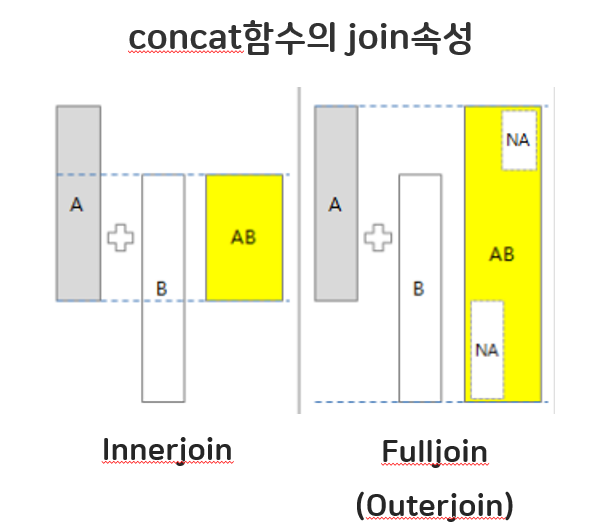

In [70]:
# df1, df4를 병합
# 기본값은 Fulljoin 
# 열로 가져다 붙여서 인덱스 번호가 같은 것끼리 

pd.concat([df1, df4])

,A,B,C,D,F
0,A0,B0,C0,NaN,NaN
1,A1,B1,C1,NaN,NaN
2,A2,B2,C2,NaN,NaN
3,A3,B3,C3,NaN,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [71]:
pd.concat([df1, df4], axis=1, join='inner')

,A,B,C,B,D,F
2,A2,B2,C2,B2,D2,F2
3,A3,B3,C3,B3,D3,F3


In [73]:
#행으로 가져다 붙여서 출력
# 갖고 잇는 데이터를 무시하고 정렬
pd.concat([df1, df4], ignore_index=True)

,A,B,C,D,F
0,A0,B0,C0,NaN,NaN
1,A1,B1,C1,NaN,NaN
2,A2,B2,C2,NaN,NaN
3,A3,B3,C3,NaN,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


Merge(데이터프레임1, 데이터프레임2)
- 두 개의 데이터프레임을 합칠 때 "특정 컬럼의 값"을 기준으로 합치는 함수

In [74]:
df5 = pd.DataFrame({'key':['K0','K1','K2','K3'],
                    'A':['A0','A1','A2','A3'],
                    'B':['B0','B1','B2','B3']})

df6 = pd.DataFrame({'key':['K0','K2','K3','K4'],
                    'C':['C0','C1','C2','C3'],
                    'D':['D0','D1','D2','D3']})

In [75]:
 pd.merge(df5, df6, on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C1,D1
2,K3,A3,B3,C2,D2


In [76]:
# how = 'right' 오른쪽 df를 기준으로 병합
pd.merge(df5, df6, on='key', how = 'right')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C1,D1
2,K3,A3,B3,C2,D2
3,K4,NaN,NaN,C3,D3
